In [24]:
cd Hospital_mgmt

/content/drive/My Drive/Hospital_mgmt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD

In [0]:
optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# dimensions of our images.
img_width, img_height = 150, 300

In [0]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [78]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 43 images belonging to 8 classes.
Found 18 images belonging to 8 classes.


In [79]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 28s 228ms/step - loss: 0.7473 - acc: 0.6833 - val_loss: 1.2781 - val_acc: 0.6111
Epoch 2/50
125/125 [==============================] - 27s 216ms/step - loss: 0.2643 - acc: 0.8935 - val_loss: 1.3441 - val_acc: 0.7778
Epoch 3/50
125/125 [==============================] - 27s 217ms/step - loss: 0.1178 - acc: 0.9568 - val_loss: 1.6542 - val_acc: 0.7222
Epoch 4/50
125/125 [==============================] - 27s 213ms/step - loss: 0.0904 - acc: 0.9669 - val_loss: 1.1449 - val_acc: 0.7222
Epoch 5/50
125/125 [==============================] - 27s 218ms/step - loss: 0.0784 - acc: 0.9713 - val_loss: 1.6958 - val_acc: 0.7778
Epoch 6/50
125/125 [==============================] - 27s 217ms/step - loss: 0.0429 - acc: 0.9844 - val_loss: 1.1696 - val_acc: 0.7778
Epoch 7/50
125/125 [==============================] - 27s 214ms/step - loss: 0.0369 - acc: 0.9852 - val_loss: 1.3114 - val_acc: 0.7222
Epoch 8/50
125/125 [==============================] - 2

In [0]:
model.save('model_1.h5')

**TRAINING**


In [81]:
# import tensorflow as tf
from keras.models import load_model
loaded_model = load_model('model_1.h5')
loaded_model.layers[0].input_shape

(None, 150, 300, 3)

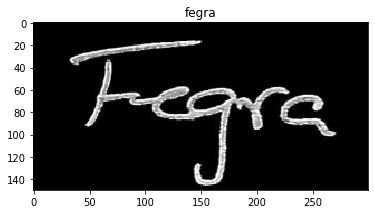

In [106]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
import numpy as np

get_med_name = ['calpol','dolo','dolpi','fegra','kofnez','lzhh','serta','sitra']
image_path="data/validation/fegra_test.jpg"
img = image.load_img(image_path, target_size=(150, 300))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
med_name = get_med_name[result[0]]
plt.title(med_name)
plt.show()